# Modeling

![a](https://wallpapercave.com/dwp1x/wp4908775.jpg)

### Thư viện cần thiết cho việc build model 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.metrics import accuracy_score

from IPython import display
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import r2_score


from sklearn.model_selection import RepeatedKFold

### Đọc dữ liệu từ file csv

Trước hết, chúng ta sẽ import bộ dữ liệu đã crawl được vào file DataFiFa và lưu trữ nó trong một biến gọi là df.

In [2]:
df = pd.read_csv("Data_Cleaned.csv")
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",13,1132,7,10,0,0,4.3,83.4,0.0,7,8.65
1,Neymar,PSG,"AM(CLR),FW",12,1085,11,9,3,0,2.4,82.6,0.1,2,7.96
2,Erling Haaland,Man City,FW,12,1041,18,3,2,0,4.0,76.5,1.0,3,7.90
3,Kylian Mbappé,PSG,"AM(LR),FW",13,1146,12,2,2,0,4.3,84.0,0.4,1,7.87
4,Kevin De Bruyne,Man City,"M(CLR),FW",13,1135,3,9,0,0,2.4,79.5,0.4,5,7.76


### Tách dữ liệu để train-test:
Về cơ bản, trước khi chia dữ liệu thành tập dữ liệu để train - test, chúng ta cần chia dữ liệu thành hai giá trị : giá trị đích và giá trị dự báo. Hãy gọi giá trị đích Y và các giá trị dự báo X
- X là list giá trị feature 
- y lấy giá trị của cột Ratting


In [3]:
Features= ['Apps','Mins','Goals','Assists','YelCard','RedCard','SpG','PS','AerialsWon','MotM']

In [4]:
X =df[Features]
y= df["Ratting"]

Bây giờ chúng ta có thể split dữ liệu để train và test với snippet như sau

- Nếu chúng ta kiểm tra shape của mỗi biến, chúng ta đã có được bộ dữ liệu với tập dữ liệu thử nghiệm có tỷ lệ 80% đối với dữ liệu train và 20% đối với dữ liệu test.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8,random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(1156, 10) (290, 10) (1156,) (290,)


### Xây dựng hàm Grid search để tìm best hyperparameter cho LinearRegression và RandomForestResgression

In [6]:
def Grid_Search_LinearRegression(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LinearRegression

    estimator = LinearRegression()
    param_grid = { 
            
            "n_jobs" : [None,2,4,8],
            "fit_intercept": [True, False],
            "copy_X":  [True, False],
            "positive": [True, False]

            }
    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    return grid.best_score_ , grid.best_params_


def Grid_Search_RandomForest(X_train, y_train):
    from sklearn.model_selection import GridSearchCV

    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30,100],
            "max_features"      : [None, "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            "max_leaf_nodes": [None, 10,20,30]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_


### Viết hàm để tính giá trị MSE và RMSE
- Các công thức cơ bản về MSE và RMSE
- Với RMSE sẽ cho biết mức độ phân tán các giá trị dự đoán từ các giá trị thực tế
- Để kiểm tra mức độ lỗi của một mô hình, chúng ta có thể sử dụng Mean Squared Error(mse) và Root Mean Square Error (RMSE).
- Đây là một trong các phương pháp để đo trung bình của ô vuông của sai số. Về cơ bản, nó sẽ kiểm tra sự khác biệt giữa giá trị thực tế và giá trị dự đoán. Để sử dụng nó, chúng ta có thể sử dụng hàm bình phương trung bình sai số của scikit-learn bằng cách chạy đoạn mã này
- Giá trị cằng gần 0 thì độ chính xác càng cao.

![a](https://solieu.vip/wp-content/uploads/2020/07/mse-768x233.png)

![a](https://solieu.vip/wp-content/uploads/2020/07/cong-thuc-rmse.png)

In [7]:
def performance(y_pred,y_test):
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Random Forest Model


- Chọn ra những best parameters

In [8]:
best_score, best_params = Grid_Search_RandomForest(X_train, y_train)

print ("Best Score:" ,best_score)
print ("Best params:",best_params)

Best Score: 0.6481326943576557
Best params: {'bootstrap': True, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_split': 4, 'n_estimators': 100}


- Random Forest là một kỹ thuật hòa tấu có khả năng thực hiện cả nhiệm vụ hồi quy và phân loại với việc sử dụng nhiều cây quyết định và một kỹ thuật được gọi là Bootstrap và Aggregation, thường được gọi là đóng bao. Ý tưởng cơ bản đằng sau điều này là kết hợp nhiều cây quyết định trong việc xác định kết quả cuối cùng thay vì dựa vào các cây quyết định riêng lẻ.
Random Forest có nhiều cây quyết định làm mô hình học tập cơ sở.
- Ta sẽ đào tạo mô hình trên tập huấn luyện và thực hiện các dự đoán trên tập kiểm tra.
- Nhập lớp DecisionTreeRegressor từ sklearn.tree và gán nó cho biến _model
- Hàm .fit() cho phép huấn luyện mô hình, điều chỉnh trọng số theo các giá trị dữ liệu để đạt được độ chính xác cao hơn

In [9]:
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
_model= RandomForestRegressor(bootstrap= True, max_features='sqrt', max_leaf_nodes= None, min_samples_split=4, n_estimators=100)
from sklearn.datasets import make_regression

_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=4)

 - Mô hình đã sẵn sàng để đưa ra dự đoán, được gọi bằng phương thức .predict().

In [10]:
y_pred= _model.predict(X_test)

 - Bây giờ hãy so sánh các giá trị đầu ra thực tế cho X_test với các giá trị được dự đoán, thực thi đoạn mã sau:

In [11]:
pd.DataFrame({'b':y_test,'_model_preds':y_pred})

,b,_model_preds
1083,6.42,6.621066
477,6.71,6.742230
184,6.97,6.792998
302,6.85,6.704261
984,6.47,6.329350
...,...,...
553,6.66,6.634160
526,6.68,6.823935
186,6.97,6.955955
156,7.00,6.865049


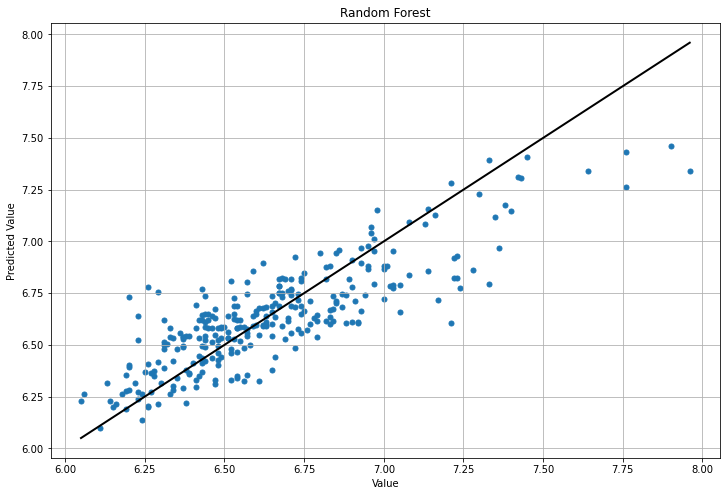

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred,marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.grid(True)
plt.xlabel("Value")
plt.ylabel("Predicted Value")
plt.title("Random Forest")
plt.show()

#### Nhận xét:
- Các giá trị scatter plot theo chiều thuận 
- plot thì theo chiều thuận
- => Mô hình này có độ chính xác cao.

- Sau khi tạo model,ta kiểm tra tính chính xác bằng cách sử dụng giá trị thực tế và dự đoán.
- Sau đó ta có được giá trị của MSE và RMSE cùng với r2_score , dự trên các con số trên ta có thể thấy đuọc tính chính xác của mô hình
- r2_score số được sử dụng để đánh giá hiệu suất của mô hình hồi quy tuyến tính. 

In [13]:
r2= []
rforest_model_r2 = r2_score(y_test, y_pred)
rforest_model_accuracy = round(rforest_model_r2*100, 2)
performance(y_pred, y_test)
print("R2 of RandomForest model is "+ str(rforest_model_accuracy)+"%")
r2.append(rforest_model_accuracy)

MSE: 0.03214983031118803
RMSE: 0.17930373758287368
R2 of RandomForest model is 70.82%


## Linear Regression

- Chọn ra những best parameters

In [14]:

best_score, best_params = Grid_Search_LinearRegression(X_train, y_train)

print ("Best Score:" ,best_score)
print ("Best params:",best_params)

Best Score: 0.6716897078482104
Best params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


- Chúng ta sẽ chạy hồi quy tuyến tính với những best paramesters vừa tìm được

In [15]:
lr = LinearRegression(copy_X= True, fit_intercept= True,n_jobs= None, positive= False )
lr.fit(X_train,y_train)

#The predicted data
y_pred = lr.predict(X_test)

In [16]:
pd.DataFrame({'y': y_test, 'y_pred': y_pred})

,y,y_pred
1083,6.42,6.623094
477,6.71,6.706299
184,6.97,6.758706
302,6.85,6.527002
984,6.47,6.337843
...,...,...
553,6.66,6.599414
526,6.68,6.746507
186,6.97,6.882213
156,7.00,6.936321


Đoạn mã trên sẽ phù hợp với một mô hình dựa trên X_train và y_train. Bây giờ ta đã có mô hình tuyến tính,ta sẽ cố gắng dự đoán nó cho X_test và các giá trị dự đoán sẽ được lưu trong y_pred. Để hình dung sự khác biệt giữa giá thực tế và giá trị dự đoán,ta sẽ vẽ một đồ thị để có thể dễ dàng hình dung

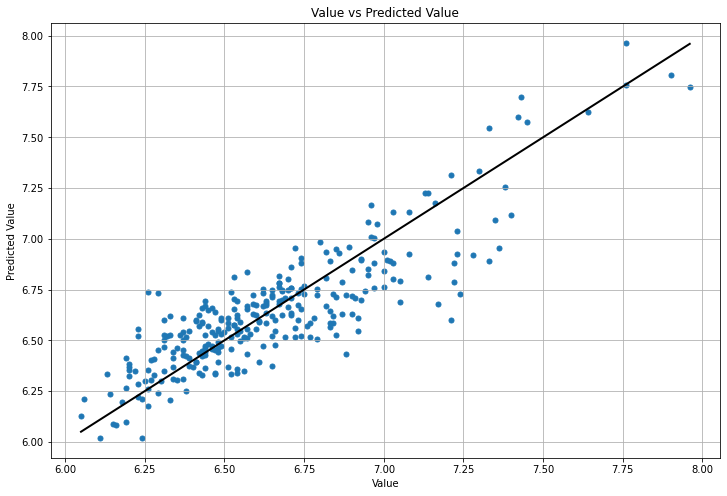

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred,marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.grid(True)
plt.xlabel("Value")
plt.ylabel("Predicted Value")
plt.title("Value vs Predicted Value")
plt.show()

#### Nhận xét: 
- Các giá trị scartter plot phân bố theo chiều thuận. Cùng chiều với plot
- Mô hình này có khả năng chính xác cao 

- Để biết chính xác tới mức nào, ta cần tính giá trị MSE, RMSE: 2 giá trị này càng gần với 0 thì mô hình càng chính xác 
- r2_score số được sử dụng để đánh giá hiệu suất của mô hình hồi quy tuyến tính. 
- Kết được hiển thị bên dưới 

In [18]:

linear_model_r2 = r2_score(y_test, y_pred)
linear_model_accuracy = round(linear_model_r2*100, 2)
performance(y_pred,y_test)
print("R2 of LinearRegression model is "+ str(linear_model_accuracy)+"%")
r2.append(linear_model_accuracy)

MSE: 0.027399551255075368
RMSE: 0.16552809808330238
R2 of LinearRegression model is 75.13%


### Cross Validation (KFold)
![a](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [19]:

for col in range(3,12):
    X = np.array(df.iloc[:, col]).reshape(-1, 1)
    y = df.iloc[:, -1]
    
    model = LinearRegression()
    CV = KFold(n_splits=10, random_state=42, shuffle=True)
    
    for train_idx, test_idx in CV.split(X):
        X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print('\nCol:', df.columns[col])
    print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, test_pred))
    print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    print (df.columns[col], cross_val_score(model, X, y, cv = 10).mean())
  



Col: Apps
Mean Squared Error(MSE): 0.051181953940810265
Root Mean Squared Error(RMSE): 0.22623428993150058
Apps -50.15472918235596

Col: Mins
Mean Squared Error(MSE): 0.05142616485953044
Root Mean Squared Error(RMSE): 0.22677337775746614
Mins -50.77309121208144

Col: Goals
Mean Squared Error(MSE): 0.061922675265877886
Root Mean Squared Error(RMSE): 0.24884267171423372
Goals -43.367122056817955

Col: Assists
Mean Squared Error(MSE): 0.07808337442093229
Root Mean Squared Error(RMSE): 0.2794340251668223
Assists -48.07609927588168

Col: YelCard
Mean Squared Error(MSE): 0.0807686226254849
Root Mean Squared Error(RMSE): 0.2841982101025355
YelCard -45.34496880942931

Col: RedCard
Mean Squared Error(MSE): 0.08219051243285741
Root Mean Squared Error(RMSE): 0.28668887741392657
RedCard -44.83452331388155

Col: SpG
Mean Squared Error(MSE): 0.06651197608922294
Root Mean Squared Error(RMSE): 0.2578991587602079
SpG -49.9437285421436

Col: PS
Mean Squared Error(MSE): 0.08514633128447822
Root Mean Squ

### Ta nhận xét độ khả quan của các mô hình trên

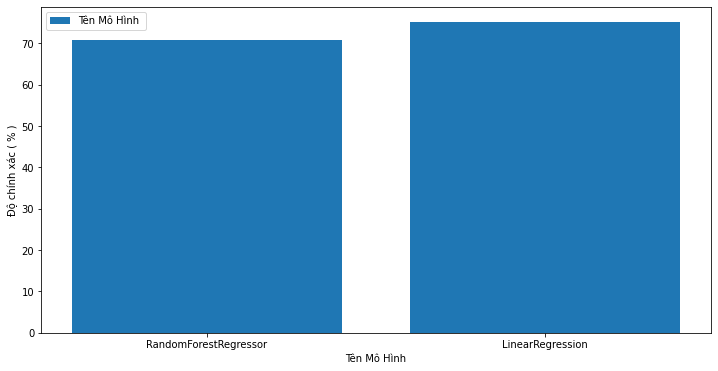

In [20]:
x= [ 'RandomForestRegressor', 'LinearRegression']
y = r2
plt.figure (figsize= (12,6))
plt.bar(x,y,label= "Tên Mô Hình ")
plt.xlabel('Tên Mô Hình')
plt.ylabel('Độ chính xác ( % )')
plt.legend()
plt.show()

### Nhận xét: 
- Theo R2_score thì t thấy mô hình LinearRegression sẽ tốt hơn mô hình RandomForestRegressor


### Tài liệu kham khảo
- Documentation Pandas: https://pandas.pydata.org/docs/user_guide/index.html 
- Documentation Sklearn: https://scikit-learn.org/0.21/documentation.html 
- Tài liệu của giảng viên lí thuyết 